<a href="https://colab.research.google.com/github/AdityaDinata/Data-Mining-3/blob/main/Data_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Performa Hero dalam kejuaraan M5 World Championship**

#**Import Library**

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [104]:
from sklearn.cluster import AgglomerativeClustering

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
from sklearn.preprocessing import MinMaxScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

M5 World Championship adalah kejuaraan Mobile Legends Bang Bang (MLBB) tertinggi di dunia, yang sering dijadikan tolok ukur bagi para pemain MLBB. Analisis ini bertujuan untuk memberikan wawasan tentang performa hero di kejuaraan M5 agar para pemain MLBB dapat memilih hero dengan lebih baik.



##**Assess Situation**

Pertumbuhan pesat industri e-sports dan popularitas MLBB membuat para pemain semakin tertarik untuk memahami hero dan tren meta di level kompetisi tingkat dunia. Namun, kurangnya pemahaman yang mendalam tentang kinerja hero dan tren meta di M5 World Championship menjadi hambatan bagi para pemain dalam membuat keputusan strategis dalam permainan.

##**Data Mining Goals**

1. **Menganalisis Kinerja Hero:** Meneliti kinerja berbagai hero yang digunakan dalam M5 World Championship untuk mengidentifikasi hero yang efektif dan populer.

2. **Menganalisis Meta Permainan:** Memeriksa tren meta permainan yang dominan dalam M5 World Championship untuk memberikan wawasan tentang strategi dan gaya bermain yang efektif.

3. **Memberikan Rekomendasi kepada Pemain:** Memberikan rekomendasi kepada pemain MLBB tentang pilihan hero berdasarkan kinerja mereka di M5 World Championship.



##**Project Plan**

1. **Data Collection**: Mengumpulkan data kinerja hero dari sumber terpercaya, seperti statistik pick, win, dan loss.
2. **Data Preprocessing**: Membersihkan dan mempersiapkan data untuk analisis dengan menghilangkan entri yang tidak relevan atau tidak lengkap.
3. **Exploratory Data Analysis (EDA)**: Mengeksplorasi distribusi, tren, dan pola kinerja hero melalui visualisasi data.
4. **Advanced Analysis**: Melakukan analisis lebih lanjut untuk mengidentifikasi hero dominan dan tren strategi yang efektif.
5. **Visualization**: Membuat visualisasi untuk menyajikan hasil analisis dengan jelas dan mudah dimengerti.
6. **Documentation**: Mendokumentasikan metodologi, temuan, dan rekomendasi dalam sebuah laporan.
7. **Validation and Iteration**: Melakukan validasi hasil analisis dan iterasi tambahan jika diperlukan untuk memastikan kualitas dan keakuratan analisis.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Data ini berisi statistik hero yang digunakan di M5 World Championship
Sumber dari data ini kagle https://www.kaggle.com/datasets/myudak/m5-world-championship

In [109]:
df = pd.read_csv("https://raw.githubusercontent.com/AdityaDinata/Data-Mining-3/main/Data%20Cleaned.csv")
df.head()
# df = pd.read_csv("Data Cleaned.csv")
# df.head()


,T_Picked,T_Wins,T_Loses,T_WinRate,T_PickPercentage,BS_Picked,BS_Wins,BS_Loses,BS_WinRate,RS_Picked,...,Hero_ Valir,Hero_ Vexana,Hero_ Wanwan,Hero_ X.Borg,Hero_ Xavier,Hero_ Yi Sun-Shin,Hero_ Yin,Hero_ Yu Zhong,Hero_ Yve,Hero_ Zilong
0,527,265,262,50.28,37.70,258,125,133,48.45,269,...,0,0,0,0,0,0,0,0,0,0
1,502,255,247,50.80,35.91,245,129,116,52.65,257,...,0,0,0,0,0,0,0,0,0,0
2,479,215,264,44.89,34.26,249,121,128,48.59,230,...,0,0,0,0,0,0,0,0,0,0
3,460,249,211,54.13,32.90,224,118,106,52.68,236,...,0,0,0,0,0,0,0,0,0,0
4,433,233,200,53.81,30.97,198,99,99,50.00,235,...,0,0,0,0,0,0,0,0,0,0


##**Describe Data**

####Informasi Dasar

In [110]:

jumlah_baris = df.shape[0]
jumlah_kolom = df.shape[1]

print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)

Jumlah baris: 110
Jumlah kolom: 128


Di dalam dataset ini terdapat 115 jumlah baris dan 23 jumlah kolom

####Informasi Lanjutan

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Columns: 128 entries, T_Picked to Hero_ Zilong
dtypes: float64(7), int64(121)
memory usage: 110.1 KB




1. **Index**: Nomor indeks.
   - Jumlah: 115
   - Tipe Data: integer (int64)

2. **Hero**: Nama Hero.
   - Jumlah: 115
   - Tipe Data: object

3. **T_Picked**: Total Hero dipilih.
   - Jumlah: 115
   - Tipe Data: integer (int64)

4. **T_Wins**: Total kemenangan dengan Hero tersebut.
   - Jumlah: 115
   - Tipe Data: integer (int64)

5. **T_Loses**: Total kekalahan dengan Hero tersebut.
   - Jumlah: 115
   - Tipe Data: integer (int64)

6. **T_WinRate**: Persentase kemenangan (T_Wins / Total Games).
   - Jumlah: 115
   - Tipe Data: object

7. **T_PickPercentage**: Persentase pick (T_Picked / Total Games).
   - Jumlah: 115
   - Tipe Data: object

8. **BS_Picked**: Total Hero dipilih oleh Tim Biru.
   - Jumlah: 115
   - Tipe Data: integer (int64)

9. **BS_Wins**: Total kemenangan dengan Hero oleh Tim Biru.
   - Jumlah: 115
   - Tipe Data: integer (int64)

10. **BS_Loses**: Total kekalahan dengan Hero oleh Tim Biru.
    - Jumlah: 115
    - Tipe Data: integer (int64)

11. **BS_WinRate**: Persentase kemenangan oleh Tim Biru (BS_Wins / BS_Picked).
    - Jumlah: 115
    - Tipe Data: object

12. **RS_Picked**: Total Hero dipilih oleh Tim Merah.
    - Jumlah: 115
    - Tipe Data: integer (int64)

13. **RS_Wins**: Total kemenangan dengan Hero oleh Tim Merah.
    - Jumlah: 115
    - Tipe Data: integer (int64)

14. **RS_Loses**: Total kekalahan dengan Hero oleh Tim Merah.
    - Jumlah: 115
    - Tipe Data: integer (int64)

15. **RS_WinRate**: Persentase kemenangan oleh Tim Merah (RS_Wins / RS_Picked).
    - Jumlah: 115
    - Tipe Data: object

16. **T_Banned**: Jumlah kali Hero tersebut dibanned.
    - Jumlah: 115
    - Tipe Data: integer (int64)

17. **T_BansPercentage**: Persentase ban (T_Banned / Total Games).
    - Jumlah: 115
    - Tipe Data: object

18. **T_PicksBans**: Jumlah kali Hero tersebut dipilih atau dibanned.
    - Jumlah: 115
    - Tipe Data: integer (int64)

19. **T_PicksBansPercentage**: Persentase pick dan ban (Pick&Ban / Total Games).
    - Jumlah: 115
    - Tipe Data: object

20. **Played By**: Dimainkan oleh siapa.
    - Jumlah: 115
    - Tipe Data: object

21. **Played With**: Dimainkan bersama dengan siapa.
    - Jumlah: 115
    - Tipe Data: object

22. **Played Vs.**: Dimainkan melawan siapa.
    - Jumlah: 115
    - Tipe Data: object

23. **Roles**: Peran dari Hero.
    - Jumlah: 115
    - Tipe Data: object



####Informasi Statistik Deskriptif

In [112]:
df.describe()

,T_Picked,T_Wins,T_Loses,T_WinRate,T_PickPercentage,BS_Picked,BS_Wins,BS_Loses,BS_WinRate,RS_Picked,...,Hero_ Valir,Hero_ Vexana,Hero_ Wanwan,Hero_ X.Borg,Hero_ Xavier,Hero_ Yi Sun-Shin,Hero_ Yin,Hero_ Yu Zhong,Hero_ Yve,Hero_ Zilong
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,104.963636,52.227273,52.736364,45.014818,7.507909,52.472727,25.872727,26.600000,43.715727,52.490909,...,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091
std,138.974285,70.560230,69.128610,20.679265,9.940792,69.653231,35.171691,34.992319,21.497189,69.931781,...,0.095346,0.095346,0.095346,0.095346,0.095346,0.095346,0.095346,0.095346,0.095346,0.095346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,3.000000,4.000000,37.500000,0.377500,3.000000,1.000000,1.250000,37.672500,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.500000,17.500000,17.500000,47.560000,2.825000,15.000000,7.000000,9.000000,47.730000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,170.750000,86.000000,87.000000,53.840000,12.212500,90.750000,39.750000,41.000000,53.505000,78.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,527.000000,265.000000,264.000000,100.000000,37.700000,258.000000,129.000000,133.000000,100.000000,269.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




1. **Index**:
   - Jumlah: 115
   - Rata-rata: 58.00
   - Standar deviasi: 33.34
   - Nilai minimum: 1.00
   - Kuartil bawah (25%): 29.50
   - Median (50%): 58.00
   - Kuartil atas (75%): 86.50
   - Nilai maksimum: 115.00
   - Tipe Data: integer (int64)

2. **T_Picked**: Total Hero dipilih.
   - Jumlah: 115
   - Rata-rata: 121.52
   - Standar deviasi: 165.79
   - Nilai minimum: 0.00
   - Kuartil bawah (25%): 6.00
   - Median (50%): 43.00
   - Kuartil atas (75%): 193.00
   - Nilai maksimum: 727.00
   - Tipe Data: integer (int64)

3. **T_Wins**: Total kemenangan dengan Hero tersebut.
   - Jumlah: 115
   - Rata-rata: 60.74
   - Standar deviasi: 84.58
   - Nilai minimum: 0.00
   - Kuartil bawah (25%): 3.00
   - Median (50%): 25.00
   - Kuartil atas (75%): 89.00
   - Nilai maksimum: 383.00
   - Tipe Data: integer (int64)

4. **T_Loses**: Total kekalahan dengan Hero tersebut.
   - Jumlah: 115
   - Rata-rata: 60.78
   - Standar deviasi: 82.06
   - Nilai minimum: 0.00
   - Kuartil bawah (25%): 4.00
   - Median (50%): 22.00
   - Kuartil atas (75%): 101.00
   - Nilai maksimum: 393.00
   - Tipe Data: integer (int64)

5. **BS_Picked**: Total Hero dipilih oleh Tim Biru.
   - Jumlah: 115
   - Rata-rata: 60.74
   - Standar deviasi: 82.20
   - Nilai minimum: 0.00
   - Kuartil bawah (25%): 3.00
   - Median (50%): 20.00
   - Kuartil atas (75%): 101.50
   - Nilai maksimum: 361.00
   - Tipe Data: integer (int64)

6. **BS_Wins**: Total kemenangan dengan Hero oleh Tim Biru.
   - Jumlah: 115
   - Rata-rata: 30.04
   - Standar deviasi: 41.65
   - Nilai minimum: 0.00
   - Kuartil bawah (25%): 1.00
   - Median (50%): 11.00
   - Kuartil atas (75%): 48.00
   - Nilai maksimum: 184.00
   - Tipe Data: integer (int64)

7. **BS_Loses**: Total kekalahan dengan Hero oleh Tim Biru.
   - Jumlah: 115
   - Rata-rata: 30.70
   - Standar deviasi: 41.15
   - Nilai minimum: 0.00
   - Kuartil bawah (25%): 2.00
   - Median (50%): 12.00
   - Kuartil atas (75%): 51.50
   - Nilai maksimum: 191.00
   - Tipe Data: integer (int64)

8. **RS_Picked**: Total Hero dipilih oleh Tim Merah.
   - Jumlah: 115
   - Rata-rata: 60.78
   - Standar deviasi: 84.21
   - Nilai minimum: 0.00
   - Kuartil bawah (25%): 3.00
   - Median (50%): 23.00
   - Kuartil atas (75%): 95.00
   - Nilai maksimum: 379.00
   - Tipe Data: integer (int64)

9. **RS_Wins**: Total kemenangan dengan Hero oleh Tim Merah.
   - Jumlah: 115
   - Rata-rata: 30.70
   - Standar deviasi: 43.39
   - Nilai minimum: 0.00
   - Kuartil bawah (25%): 1.00
   - Median (50%): 12.00
   - Kuartil atas (75%): 44.50
   - Nilai maksimum: 199.00
   - Tipe Data: integer (int64)

10. **RS_Loses**: Total kekalahan dengan Hero oleh Tim Merah.
    - Jumlah: 115
    - Rata-rata: 30.09
    - Standar deviasi: 41.38
    - Nilai minimum: 0.00
    - Kuartil bawah (25%): 2.00
    - Median (50%): 12.00
    - Kuartil atas (75%): 46.00
    - Nilai maksimum: 202.00
    - Tipe Data: integer (int64)

11. **T_Banned**: Jumlah kali Hero tersebut dibanned.
    - Jumlah: 115
    - Rata-rata: 121.51
    - Standar deviasi: 180.27
    - Nilai minimum: 0.00
    - Kuartil bawah (25%): 2.50
    - Median (50%): 24.00
    - Kuartil atas (75%): 174.50
    - Nilai maksimum: 741.00
    - Tipe Data: integer (int64)

12. **T_PicksBans**: Jumlah kali Hero tersebut dipilih atau dibanned.
    - Jumlah: 115
    - Rata-rata: 243.03
    - Standar deviasi: 322.98
    - Nilai minimum: 1.00
    - Kuartil bawah (25%): 10.50
    - Median (50%): 83.00
    - Kuartil atas (75%): 373.00
    - Nilai maksimum: 1211.00
    - Tipe Data: integer (int64)



**Merubah Kolom Kolom Tipe data Objek Menjadi Numerik Agar Bisa Lebih Mudah Di Visualisasikan**

##**Exploratory Data Analysis**

In [114]:
df_wr = df.sort_values('T_WinRate')

fig = px.bar(
    df_wr,
    x='Hero',
    y='T_WinRate',
    color='T_WinRate',
    labels={"T_WinRate":"Win Rate"},
    title='Distribusi Tingkat Win Rate Hero'
)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['T_Picked', 'T_Wins', 'T_Loses', 'T_WinRate', 'T_PickPercentage', 'BS_Picked', 'BS_Wins', 'BS_Loses', 'BS_WinRate', 'RS_Picked', 'RS_Wins', 'RS_Loses', 'RS_WinRate', 'T_Banned', 'T_BansPercentage', 'T_PicksBans', 'T_PicksBansPercentage', 'Roles', 'Hero_\xa0Aamon', 'Hero_\xa0Akai', 'Hero_\xa0Aldous', 'Hero_\xa0Alice', 'Hero_\xa0Alpha', 'Hero_\xa0Alucard', 'Hero_\xa0Arlott', 'Hero_\xa0Atlas', 'Hero_\xa0Aulus', 'Hero_\xa0Badang', 'Hero_\xa0Balmond', 'Hero_\xa0Bane', 'Hero_\xa0Barats', 'Hero_\xa0Baxia', 'Hero_\xa0Beatrix', 'Hero_\xa0Belerick', 'Hero_\xa0Benedetta', 'Hero_\xa0Brody', 'Hero_\xa0Bruno', 'Hero_\xa0Carmilla', 'Hero_\xa0Cecilion', "Hero_\xa0Chang'e", 'Hero_\xa0Chou', 'Hero_\xa0Claude', 'Hero_\xa0Clint', 'Hero_\xa0Cyclops', 'Hero_\xa0Diggie', 'Hero_\xa0Dyrroth', 'Hero_\xa0Edith', 'Hero_\xa0Esmeralda', 'Hero_\xa0Estes', 'Hero_\xa0Faramis', 'Hero_\xa0Floryn', 'Hero_\xa0Franco', 'Hero_\xa0Freya', 'Hero_\xa0Gloo', 'Hero_\xa0Gord', 'Hero_\xa0Granger', 'Hero_\xa0Grock', 'Hero_\xa0Guinevere', 'Hero_\xa0Gusion', 'Hero_\xa0Hanabi', 'Hero_\xa0Hanzo', 'Hero_\xa0Harith', 'Hero_\xa0Harley', 'Hero_\xa0Hayabusa', 'Hero_\xa0Helcurt', 'Hero_\xa0Hilda', 'Hero_\xa0Hylos', 'Hero_\xa0Irithel', 'Hero_\xa0Ixia', 'Hero_\xa0Jawhead', 'Hero_\xa0Joy', 'Hero_\xa0Julian', 'Hero_\xa0Kadita', 'Hero_\xa0Kagura', 'Hero_\xa0Kaja', 'Hero_\xa0Karina', 'Hero_\xa0Karrie', 'Hero_\xa0Khaleed', 'Hero_\xa0Khufra', 'Hero_\xa0Kimmy', 'Hero_\xa0Lancelot', 'Hero_\xa0Lapu-Lapu', 'Hero_\xa0Layla', 'Hero_\xa0Leomord', 'Hero_\xa0Lesley', 'Hero_\xa0Ling', 'Hero_\xa0Lolita', 'Hero_\xa0Lunox', 'Hero_\xa0Luo Yi', 'Hero_\xa0Lylia', 'Hero_\xa0Martis', 'Hero_\xa0Masha', 'Hero_\xa0Mathilda', 'Hero_\xa0Melissa', 'Hero_\xa0Minotaur', 'Hero_\xa0Minsitthar', 'Hero_\xa0Miya', 'Hero_\xa0Moskov', 'Hero_\xa0Nana', 'Hero_\xa0Natalia', 'Hero_\xa0Natan', 'Hero_\xa0Nolan', 'Hero_\xa0Novaria', 'Hero_\xa0Paquito', 'Hero_\xa0Pharsa', 'Hero_\xa0Phoveus', 'Hero_\xa0Popol and Kupa', 'Hero_\xa0Rafaela', 'Hero_\xa0Roger', 'Hero_\xa0Ruby', 'Hero_\xa0Saber', 'Hero_\xa0Selena', 'Hero_\xa0Silvanna', 'Hero_\xa0Sun', 'Hero_\xa0Thamuz', 'Hero_\xa0Tigreal', 'Hero_\xa0Uranus', 'Hero_\xa0Vale', 'Hero_\xa0Valir', 'Hero_\xa0Vexana', 'Hero_\xa0Wanwan', 'Hero_\xa0X.Borg', 'Hero_\xa0Xavier', 'Hero_\xa0Yi Sun-Shin', 'Hero_\xa0Yin', 'Hero_\xa0Yu Zhong', 'Hero_\xa0Yve', 'Hero_\xa0Zilong'] but received: Hero

Bisa diliat pada visualisasi di atas tingkat kemenangan/Win rate dari hero yang di pick di M5 Miya,
 Moskov, Freya dan Saber memiliki tingkat kemenangan tertinggi dan Alucard, Tigreal, Roger dan Zilong tidak memiliki win rate atau 0% Win Rate.

In [ ]:
fig = px.bar(df.sort_values('T_WinRate'), x='Hero', y=['BS_WinRate', 'RS_WinRate'],
             title='Win Rates by Side',
             labels={'value': 'Win Rate', 'variable': 'Side'},
             color_discrete_map={'BS_WinRate': 'blue', 'RS_WinRate': 'red'},
             barmode='group')

fig.update_layout(xaxis_title='Hero', yaxis_title='Win Rate', legend_title='Side')
fig.show()



Bisa diliat dari visualisasi di atas menampilkan tingkat kemenangan/Win rate hero yang jika di pakai oleh tim biru/merah dimana hero-hero yang di pakai oleh tim merah memiliki win rate yang lebih tinggi.

In [ ]:
role_counts = df['Roles'].value_counts().reset_index()
fig = px.bar(
    role_counts,
    x='Roles',
    y='index',
    labels={'index': 'Role', 'Roles': 'Roles'},
    title='Distribution of Hero Roles in the Dataset',
)
fig.update_layout(
    xaxis=dict(title='Roles'),
)
fig.show()


Dari visualisasi di atas, terlihat bahwa distribusi role-role hero pada M5 World Championship menunjukkan bahwa role yang paling banyak didistribusikan adalah mage, diikuti oleh fighter, dan role yang paling sedikit didistribusikan adalah marksman/mage, mage/support, mage/assassin, marksman/fighter, marksman/support, fighter/support, support/mage, support/assassin, dan mage/tank.

In [ ]:
fig = px.bar(df.sort_values(by='T_Picked'), x='Hero', y='T_Picked',
             title='Jumlah Pick Secara Keseluruhan untuk Setiap hero',
             labels={'Hero': 'Heroes', 'T_Picked': 'Jumlah Pick'},
             color='T_Picked',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Hero', yaxis_title='Jumlah Pick')
fig.show()

Dari hasil visualisasi diatas kit dapt mengetahui hero apa saja yang paling sering di pick dan yang paling sering di pick adalah hero valentina dan fredrin.

In [ ]:
fig = px.scatter(df, x='T_Picked', y='T_WinRate',
                 title='Korelasi Antara Pilihan Hero dengan Win Ratenya',
                 labels={'T_Picked': 'Total Heroes Picked', 'T_WinRate': 'Win Rate'},
                 color='Hero',
                 color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Total Heroes Picked', yaxis_title='Win Rate')
fig.show()

Dari visualisasi diatas kita dapat melihat korelasi dari total pick hero dengan win rate dari hero tersebut dimana kita dapat melihat Win rate yang tinggi kebanyakan pick heronya masih sedikit.

In [ ]:
fig = px.bar(df.sort_values(by='T_BansPercentage'), x='Hero', y='T_BansPercentage',
             title='Overall Ban Percentage for Each Hero',
             labels={'Hero': 'Heroes', 'T_BansPercentage': 'Ban Percentage'},
             color='T_BansPercentage',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Heroes', yaxis_title='Ban Percentage')
fig.show()

Dari visualisasi diatas kita dapat melihat hero hero apa saja yang sering di ban, dan angela adalah hero paling sering di ban pada kejuaraan M5 dimana persentasi bannya 53%.

In [115]:
fig = px.bar(df.sort_values(by='T_PicksBansPercentage'), x='Hero', y='T_PicksBansPercentage',
             title='Heroes with High Pick and Ban Percentages',
             labels={'Hero': 'Heroes', 'T_PicksBansPercentage': 'Pick and Ban Percentage'},
             color='T_PicksBansPercentage',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Heroes', yaxis_title='Pick and Ban Percentage')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['T_Picked', 'T_Wins', 'T_Loses', 'T_WinRate', 'T_PickPercentage', 'BS_Picked', 'BS_Wins', 'BS_Loses', 'BS_WinRate', 'RS_Picked', 'RS_Wins', 'RS_Loses', 'RS_WinRate', 'T_Banned', 'T_BansPercentage', 'T_PicksBans', 'T_PicksBansPercentage', 'Roles', 'Hero_\xa0Aamon', 'Hero_\xa0Akai', 'Hero_\xa0Aldous', 'Hero_\xa0Alice', 'Hero_\xa0Alpha', 'Hero_\xa0Alucard', 'Hero_\xa0Arlott', 'Hero_\xa0Atlas', 'Hero_\xa0Aulus', 'Hero_\xa0Badang', 'Hero_\xa0Balmond', 'Hero_\xa0Bane', 'Hero_\xa0Barats', 'Hero_\xa0Baxia', 'Hero_\xa0Beatrix', 'Hero_\xa0Belerick', 'Hero_\xa0Benedetta', 'Hero_\xa0Brody', 'Hero_\xa0Bruno', 'Hero_\xa0Carmilla', 'Hero_\xa0Cecilion', "Hero_\xa0Chang'e", 'Hero_\xa0Chou', 'Hero_\xa0Claude', 'Hero_\xa0Clint', 'Hero_\xa0Cyclops', 'Hero_\xa0Diggie', 'Hero_\xa0Dyrroth', 'Hero_\xa0Edith', 'Hero_\xa0Esmeralda', 'Hero_\xa0Estes', 'Hero_\xa0Faramis', 'Hero_\xa0Floryn', 'Hero_\xa0Franco', 'Hero_\xa0Freya', 'Hero_\xa0Gloo', 'Hero_\xa0Gord', 'Hero_\xa0Granger', 'Hero_\xa0Grock', 'Hero_\xa0Guinevere', 'Hero_\xa0Gusion', 'Hero_\xa0Hanabi', 'Hero_\xa0Hanzo', 'Hero_\xa0Harith', 'Hero_\xa0Harley', 'Hero_\xa0Hayabusa', 'Hero_\xa0Helcurt', 'Hero_\xa0Hilda', 'Hero_\xa0Hylos', 'Hero_\xa0Irithel', 'Hero_\xa0Ixia', 'Hero_\xa0Jawhead', 'Hero_\xa0Joy', 'Hero_\xa0Julian', 'Hero_\xa0Kadita', 'Hero_\xa0Kagura', 'Hero_\xa0Kaja', 'Hero_\xa0Karina', 'Hero_\xa0Karrie', 'Hero_\xa0Khaleed', 'Hero_\xa0Khufra', 'Hero_\xa0Kimmy', 'Hero_\xa0Lancelot', 'Hero_\xa0Lapu-Lapu', 'Hero_\xa0Layla', 'Hero_\xa0Leomord', 'Hero_\xa0Lesley', 'Hero_\xa0Ling', 'Hero_\xa0Lolita', 'Hero_\xa0Lunox', 'Hero_\xa0Luo Yi', 'Hero_\xa0Lylia', 'Hero_\xa0Martis', 'Hero_\xa0Masha', 'Hero_\xa0Mathilda', 'Hero_\xa0Melissa', 'Hero_\xa0Minotaur', 'Hero_\xa0Minsitthar', 'Hero_\xa0Miya', 'Hero_\xa0Moskov', 'Hero_\xa0Nana', 'Hero_\xa0Natalia', 'Hero_\xa0Natan', 'Hero_\xa0Nolan', 'Hero_\xa0Novaria', 'Hero_\xa0Paquito', 'Hero_\xa0Pharsa', 'Hero_\xa0Phoveus', 'Hero_\xa0Popol and Kupa', 'Hero_\xa0Rafaela', 'Hero_\xa0Roger', 'Hero_\xa0Ruby', 'Hero_\xa0Saber', 'Hero_\xa0Selena', 'Hero_\xa0Silvanna', 'Hero_\xa0Sun', 'Hero_\xa0Thamuz', 'Hero_\xa0Tigreal', 'Hero_\xa0Uranus', 'Hero_\xa0Vale', 'Hero_\xa0Valir', 'Hero_\xa0Vexana', 'Hero_\xa0Wanwan', 'Hero_\xa0X.Borg', 'Hero_\xa0Xavier', 'Hero_\xa0Yi Sun-Shin', 'Hero_\xa0Yin', 'Hero_\xa0Yu Zhong', 'Hero_\xa0Yve', 'Hero_\xa0Zilong'] but received: Hero

dari visualisasi diatas kita dapat melihat persentasi dari pick dan ban hero yang ada di kejuaraan M5 dimana presentasi pick dan ban tertinggi ad pada hero valentina 86.62% dan disusul oleh hero fredrin 85.91%.

In [ ]:
fig = px.bar(df.sort_values(by="T_BansPercentage",ascending=False), x='Roles', y='T_BansPercentage',
             title='Ban Percentage by Hero Roles',
             labels={'Roles': 'Hero Roles', 'T_BansPercentage': 'Ban Percentage'},
             color='T_BansPercentage',
             color_continuous_scale='Viridis')

fig.show()

Berdasaran visualisasi diatas kita dapat melihat bahwa role hero dengan persentase ban yang paling tinggi adalah role mage.

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

Bisa kita liha hanya kolom Index saja yang tidak memiliki korelasi dengan kolom lainnya sedangkan jika Kolom yang lainnya berkorelasi satu sama lain

---



##**Verify Data Quality**

####Missing Values

In [ ]:
missing_values = df.isnull().sum()
print (missing_values)

Setiap kolom dalam DataFrame tidak memiliki nilai yang hilang.

####Outliers Values

In [ ]:
results = []

cols = df.select_dtypes(include=['int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 3*iqr
  upper_bound = q3 + 3*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

In [ ]:
boxplot = df.drop('Index', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))



- Index: Persentase outliers pada kolom Index adalah 0%, yang menunjukkan bahwa tidak ada outliers dalam kolom ini.
- T_Picked: Persentase outliers pada kolom T_Picked adalah 0%, yang menunjukkan bahwa tidak ada outliers dalam kolom ini.
- T_Wins: Persentase outliers pada kolom T_Wins adalah 1.74%, yang menunjukkan bahwa sekitar 1.74% dari nilai dalam kolom ini dianggap sebagai outliers.
- T_Loses: Persentase outliers pada kolom T_Loses adalah 0.87%, yang menunjukkan bahwa sekitar 0.87% dari nilai dalam kolom ini dianggap sebagai outliers.
- BS_Picked: Persentase outliers pada kolom BS_Picked adalah 0%, yang menunjukkan bahwa tidak ada outliers dalam kolom ini.
- BS_Wins: Persentase outliers pada kolom BS_Wins adalah 0%, yang menunjukkan bahwa tidak ada outliers dalam kolom ini.
- BS_Loses: Persentase outliers pada kolom BS_Loses adalah 0%, yang menunjukkan bahwa tidak ada outliers dalam kolom ini.
- RS_Picked: Persentase outliers pada kolom RS_Picked adalah 0.87%, yang menunjukkan bahwa sekitar 0.87% dari nilai dalam kolom ini dianggap sebagai outliers.
- RS_Wins: Persentase outliers pada kolom RS_Wins adalah 2.61%, yang menunjukkan bahwa sekitar 2.61% dari nilai dalam kolom ini dianggap sebagai outliers.
- RS_Loses: Persentase outliers pada kolom RS_Loses adalah 0.87%, yang menunjukkan bahwa sekitar 0.87% dari nilai dalam kolom ini dianggap sebagai outliers.
- T_Banned: Persentase outliers pada kolom T_Banned adalah 1.74%, yang menunjukkan bahwa sekitar 1.74% dari nilai dalam kolom ini dianggap sebagai outliers.
- T_PicksBans: Persentase outliers pada kolom T_PicksBans adalah 0%, yang menunjukkan bahwa tidak ada outliers dalam kolom ini.



####Duplicated Values

In [ ]:
print("Total Duplication: ", df.duplicated().sum())

Berdasarkan hasil diatas kita dapat mengetahui bahwa tidak ada data yang terduplikasi

####Inconsistent Values / Noise (Optional)

In [ ]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

##**Data Cleaning**

####Missing Value

Missing Vlue 0

####Outliers

In [ ]:
results = []

cols = df.select_dtypes(include=['int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 3*iqr
  upper_bound = q3 + 3*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Menghapus outlaier yang ada dengan menggunakan code dibawah ini

In [ ]:
# Menghitung quartile, IQR, batas bawah, dan batas atas untuk setiap kolom
Q1_T_Picked = df['T_Picked'].quantile(0.25)
Q3_T_Picked = df['T_Picked'].quantile(0.75)
IQR_T_Picked = Q3_T_Picked - Q1_T_Picked
lower_bound_T_Picked = Q1_T_Picked - 3 * IQR_T_Picked
upper_bound_T_Picked = Q3_T_Picked + 3 * IQR_T_Picked

Q1_T_Wins = df['T_Wins'].quantile(0.25)
Q3_T_Wins = df['T_Wins'].quantile(0.75)
IQR_T_Wins = Q3_T_Wins - Q1_T_Wins
lower_bound_T_Wins = Q1_T_Wins - 3 * IQR_T_Wins
upper_bound_T_Wins = Q3_T_Wins + 3 * IQR_T_Wins

Q1_T_Loses = df['T_Loses'].quantile(0.25)
Q3_T_Loses = df['T_Loses'].quantile(0.75)
IQR_T_Loses = Q3_T_Loses - Q1_T_Loses
lower_bound_T_Loses = Q1_T_Loses - 3 * IQR_T_Loses
upper_bound_T_Loses = Q3_T_Loses + 3 * IQR_T_Loses

Q1_BS_Picked = df['BS_Picked'].quantile(0.25)
Q3_BS_Picked = df['BS_Picked'].quantile(0.75)
IQR_BS_Picked = Q3_BS_Picked - Q1_BS_Picked
lower_bound_BS_Picked = Q1_BS_Picked - 3 * IQR_BS_Picked
upper_bound_BS_Picked = Q3_BS_Picked + 3 * IQR_BS_Picked

Q1_BS_Wins = df['BS_Wins'].quantile(0.25)
Q3_BS_Wins = df['BS_Wins'].quantile(0.75)
IQR_BS_Wins = Q3_BS_Wins - Q1_BS_Wins
lower_bound_BS_Wins = Q1_BS_Wins - 3 * IQR_BS_Wins
upper_bound_BS_Wins = Q3_BS_Wins + 3 * IQR_BS_Wins

Q1_BS_Loses = df['BS_Loses'].quantile(0.25)
Q3_BS_Loses = df['BS_Loses'].quantile(0.75)
IQR_BS_Loses = Q3_BS_Loses - Q1_BS_Loses
lower_bound_BS_Loses = Q1_BS_Loses - 3 * IQR_BS_Loses
upper_bound_BS_Loses = Q3_BS_Loses + 3 * IQR_BS_Loses

Q1_RS_Picked = df['RS_Picked'].quantile(0.25)
Q3_RS_Picked = df['RS_Picked'].quantile(0.75)
IQR_RS_Picked = Q3_RS_Picked - Q1_RS_Picked
lower_bound_RS_Picked = Q1_RS_Picked - 3 * IQR_RS_Picked
upper_bound_RS_Picked = Q3_RS_Picked + 3 * IQR_RS_Picked

Q1_RS_Wins = df['RS_Wins'].quantile(0.25)
Q3_RS_Wins = df['RS_Wins'].quantile(0.75)
IQR_RS_Wins = Q3_RS_Wins - Q1_RS_Wins
lower_bound_RS_Wins = Q1_RS_Wins - 3 * IQR_RS_Wins
upper_bound_RS_Wins = Q3_RS_Wins + 3 * IQR_RS_Wins

Q1_RS_Loses = df['RS_Loses'].quantile(0.25)
Q3_RS_Loses = df['RS_Loses'].quantile(0.75)
IQR_RS_Loses = Q3_RS_Loses - Q1_RS_Loses
lower_bound_RS_Loses = Q1_RS_Loses - 3 * IQR_RS_Loses
upper_bound_RS_Loses = Q3_RS_Loses + 3 * IQR_RS_Loses

Q1_T_Banned = df['T_Banned'].quantile(0.25)
Q3_T_Banned = df['T_Banned'].quantile(0.75)
IQR_T_Banned = Q3_T_Banned - Q1_T_Banned
lower_bound_T_Banned = Q1_T_Banned - 3 * IQR_T_Banned
upper_bound_T_Banned = Q3_T_Banned + 3 * IQR_T_Banned

Q1_T_PicksBans = df['T_PicksBans'].quantile(0.25)
Q3_T_PicksBans = df['T_PicksBans'].quantile(0.75)
IQR_T_PicksBans = Q3_T_PicksBans - Q1_T_PicksBans
lower_bound_T_PicksBans = Q1_T_PicksBans - 3 * IQR_T_PicksBans
upper_bound_T_PicksBans = Q3_T_PicksBans + 3 * IQR_T_PicksBans

# Filter DataFrame untuk menghilangkan outliers
df = df[(df['T_Picked'] >= lower_bound_T_Picked) & (df['T_Picked'] <= upper_bound_T_Picked)]
df = df[(df['T_Wins'] >= lower_bound_T_Wins) & (df['T_Wins'] <= upper_bound_T_Wins)]
df = df[(df['T_Loses'] >= lower_bound_T_Loses) & (df['T_Loses'] <= upper_bound_T_Loses)]
df = df[(df['BS_Picked'] >= lower_bound_BS_Picked) & (df['BS_Picked'] <= upper_bound_BS_Picked)]
df = df[(df['BS_Wins'] >= lower_bound_BS_Wins) & (df['BS_Wins'] <= upper_bound_BS_Wins)]
df = df[(df['BS_Loses'] >= lower_bound_BS_Loses) & (df['BS_Loses'] <= upper_bound_BS_Loses)]
df = df[(df['RS_Picked'] >= lower_bound_RS_Picked) & (df['RS_Picked'] <= upper_bound_RS_Picked)]
df = df[(df['RS_Wins'] >= lower_bound_RS_Wins) & (df['RS_Wins'] <= upper_bound_RS_Wins)]
df = df[(df['RS_Loses'] >= lower_bound_RS_Loses) & (df['RS_Loses'] <= upper_bound_RS_Loses)]
df = df[(df['T_Banned'] >= lower_bound_T_Banned) & (df['T_Banned'] <= upper_bound_T_Banned)]
df = df[(df['T_PicksBans'] >= lower_bound_T_PicksBans) & (df['T_PicksBans'] <= upper_bound_T_PicksBans)]


Batas yang saya gunakan adalah 3 kerena jika hanya 1.5 maka outlier tidak dapat dihilangkan sama sekali

In [ ]:
results = []

cols = df.select_dtypes(include=['int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 3*iqr
  upper_bound = q3 + 3*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Bisa kita liat semua outliers sudah dihilangkan kecuali pada T_Banned yang hanya tersisa 2.7% dan tidak bisa dihilangkan lagi, kaena kalau mencoba menghilangkannya outliers lain akan muncul

##**Construct Data**##

In [ ]:
df['T_WinRate'] = pd.to_numeric(df['T_WinRate'].str.strip('%'), errors='coerce')
df['T_PickPercentage'] = pd.to_numeric(df['T_PickPercentage'].str.strip('%'), errors='coerce')
df['BS_WinRate'] = pd.to_numeric(df['BS_WinRate'].str.strip('%'), errors='coerce')
df['RS_WinRate'] = pd.to_numeric(df['RS_WinRate'].str.strip('%'), errors='coerce')
df['T_BansPercentage'] = pd.to_numeric(df['T_BansPercentage'].str.strip('%'), errors='coerce')
df['T_PicksBansPercentage'] = pd.to_numeric(df['T_PicksBansPercentage'].str.strip('%'), errors='coerce')

Pada kode diatas merudah % menjadi numeric agar bisa dihitung dalam operasi dan agar kita bisa melihat Total Win Rate, Total Pick Percentage, Blue Side Win Rate, Red side Win Rate, Total Ban Precentage, Total Pick Percentage dan agar kolom kolom itu bisa divisualisasikan.

##**Data Reduction**##

In [ ]:
df.drop(['Index', 'Played By', 'Played With','Played Vs.'], axis=1,inplace=True)
df.head()

klom-kolom seperti 'Index', 'Played By', 'Played With', dan 'Played Vs.' mungkin tidak relevan atau tidak diperlukan untuk analisis atau pemodelan yang akan saya lakukan. Saya menganalisis kinerja hero dalam permainan, informasi tentang siapa yang memainkan hero tersebut, dengan siapa, atau melawan siapa tidak terlalu diperlukan.

##**Data Transformation**##

###**Maping**

In [ ]:
roles_mapping = {
    'Mage': 1,
    'Support': 2,
    'Fighter': 3,
    'Tank': 4,
    'Marksman': 5,
    'Assassin': 6,
    'Support / Mage': 2.1,
    'Fighter / Tank': 3.4,
    'Support / Assassin': 2.6,
    'Marksman / Assassin': 5.6,
    'Mage / Tank' : 1.4,
    'Assassin / Mage': 6.1,
    'Fighter / Support': 3.2,
    'Marksman / Support': 5.2,
    'Marksman / Fighter': 5.3,
    'Mage / Assassin': 1.6,
    'Marksman / Mage': 5.1,
    'Fighter / Mage': 3.1
}

df['Roles'] = df['Roles'].map(roles_mapping)


###**Encoding**

In [ ]:
df = pd.get_dummies(df)


Code tersebut digunakan untuk mengonversi variabel kategorikal dalam DataFrame menjadi bentuk biner, di mana setiap nilai kategorikal menjadi kolom baru.

In [ ]:
df

In [ ]:
df.to_csv("Data Cleaned.csv", index=False)

menyimpan data cleaned

#**Modelling Associate**

Menggunakan Modelling Associate untuk membuat kolom target yang akan digunakan pada proses Modelling Predict.

###**Pre-Processing**

#####**Adjusment**

In [116]:
x_final = df

#####**Normalisasi Data**

In [117]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)


Kode tersebut dimaksudkan untuk menormalkan atau menyesuaikan skala fitur-fitur dalam kumpulan data x_final. Normalisasi data adalah langkah penting dalam analisis data untuk memastikan bahwa semua fitur memiliki rentang nilai yang serupa

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

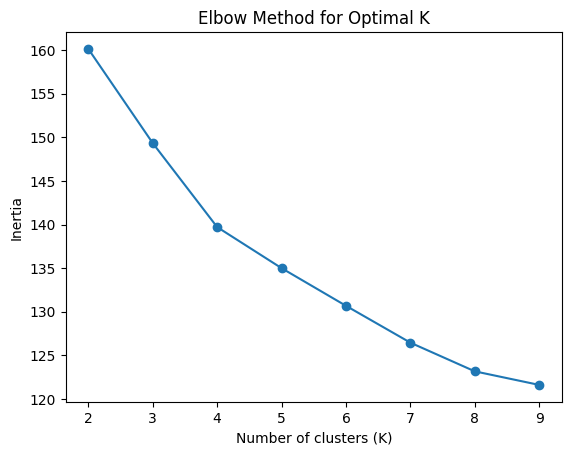

In [118]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()


Hasil tersebut berguna untuk mengidentifikasi titik di mana penambahan jumlah klaster tidak secara signifikan mengurangi inertia (total jarak kuadrat antara titik data dan pusat klaster terdekat).

###**Build Model**

#####**K-Means**

In [119]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

Tujuan dari kode tersebut adalah untuk membentuk model KMeans dengan empat klaster dan melatihnya dengan menggunakan data yang telah dinormalisasi

#####**Hierarchical Clustering**

In [120]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')


Tujuan dari kode tersebut adalah untuk membuat model Hierarchical Clustering menggunakan algoritma aglomeratif, yang dapat digunakan untuk mengelompokkan data menjadi beberapa klaster berdasarkan jarak antara titik-titik data.

###**Begins and Compare Clusters**

In [121]:
kmeans_clust = kmeans.predict(x_final_norm) + 1
hierarchy_clust = hc.fit_predict(x_final_norm) + 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Tujuan dari kode tersebut adalah untuk melakukan prediksi klaster untuk setiap titik data dalam dataset menggunakan model KMeans dan Hierarchical Clustering yang telah dibuat sebelumnya.

In [122]:

x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

Tujuan dari kode tersebut adalah untuk menggabungkan prediksi klaster dari model KMeans dan Hierarchical Clustering dengan dataframe x_final yang telah direset indeksnya, sehingga menghasilkan dataframe yang berisi data asli bersama dengan prediksi klaster untuk setiap titik data.

In [123]:
combined_data_assoc.head()

,T_Picked,T_Wins,T_Loses,T_WinRate,T_PickPercentage,BS_Picked,BS_Wins,BS_Loses,BS_WinRate,RS_Picked,...,Hero_ Wanwan,Hero_ X.Borg,Hero_ Xavier,Hero_ Yi Sun-Shin,Hero_ Yin,Hero_ Yu Zhong,Hero_ Yve,Hero_ Zilong,kmeans_cluster,hierarchy_cluster
0,527,265,262,50.28,37.70,258,125,133,48.45,269,...,0,0,0,0,0,0,0,0,2,1
1,502,255,247,50.80,35.91,245,129,116,52.65,257,...,0,0,0,0,0,0,0,0,2,1
2,479,215,264,44.89,34.26,249,121,128,48.59,230,...,0,0,0,0,0,0,0,0,2,1
3,460,249,211,54.13,32.90,224,118,106,52.68,236,...,0,0,0,0,0,0,0,0,2,1
4,433,233,200,53.81,30.97,198,99,99,50.00,235,...,0,0,0,0,0,0,0,0,2,1


Menetapkan dataframe yang telah digabungkan, yaitu combined_data_assoc, ke dalam variabel df. Hal ini memungkinkan variabel df untuk digunakan sebagai referensi dataframe yang berisi data asli serta prediksi klaster dari model KMeans dan Hierarchical Clustering, sehingga dapat digunakan sebagai dataframe dalam tahap Modelling Predict.
Output tersebut menampilkan data sampel dari dataframe yang telah dilakukan Modelling Associate.

In [124]:
df

,T_Picked,T_Wins,T_Loses,T_WinRate,T_PickPercentage,BS_Picked,BS_Wins,BS_Loses,BS_WinRate,RS_Picked,...,Hero_ Valir,Hero_ Vexana,Hero_ Wanwan,Hero_ X.Borg,Hero_ Xavier,Hero_ Yi Sun-Shin,Hero_ Yin,Hero_ Yu Zhong,Hero_ Yve,Hero_ Zilong
0,527,265,262,50.28,37.70,258,125,133,48.45,269,...,0,0,0,0,0,0,0,0,0,0
1,502,255,247,50.80,35.91,245,129,116,52.65,257,...,0,0,0,0,0,0,0,0,0,0
2,479,215,264,44.89,34.26,249,121,128,48.59,230,...,0,0,0,0,0,0,0,0,0,0
3,460,249,211,54.13,32.90,224,118,106,52.68,236,...,0,0,0,0,0,0,0,0,0,0
4,433,233,200,53.81,30.97,198,99,99,50.00,235,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1,0,1,0.00,0.07,1,0,1,0.00,0,...,0,0,0,0,0,0,0,0,0,0
106,1,0,1,0.00,0.07,0,0,0,47.73,1,...,0,1,0,0,0,0,0,0,0,0
107,1,0,1,0.00,0.07,0,0,0,47.73,1,...,0,0,0,0,0,0,0,0,0,1
108,0,0,0,47.56,0.00,0,0,0,47.73,0,...,0,0,0,0,0,0,0,0,0,0
